# Note :

1. We will be using iris DataSet because of it's Linear nature / Linearly seperable data points among different species/target .
2. We will be considering a binary classification for ease instead of multi-class classification .


In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import datasets

In [11]:
data = datasets.load_iris()
data.keys()
data2 = data.data[:,:2]
names = data.feature_names[:2]
df = pd.DataFrame(data = data2 , columns = names)

target_names = data.target_names
y = data.target
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [12]:
# here we will be considering only 2 classes for binary-case .
rows = list(range(100,150))
df = df.drop(df.index[rows])
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5


In [13]:
# replacing binary-target with -1 and 1 so the overall product will not be 0 in case .
y = data.target
y_new = []
for i in y:
    if i == int(0):
        y_new.append(-1)
    else:
        if i == int(1):
            y_new.append(1)
y_new.count(2)

0

In [14]:
y_new = pd.Series(y_new , name = 'type')
df = pd.concat([df,y_new],axis = 1)
df['type'].value_counts()
print(df.shape)

(100, 3)


In [15]:
df['type'].value_counts()


 1    50
-1    50
Name: type, dtype: int64

['setosa' 'versicolor' 'virginica']


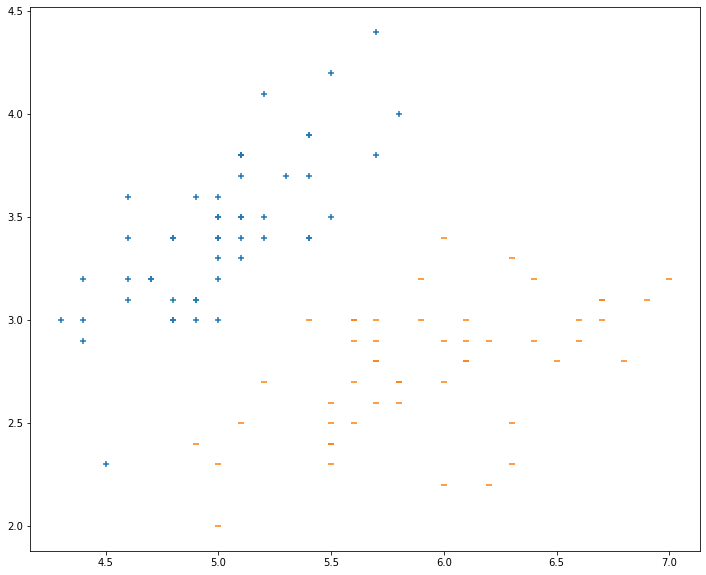

In [16]:
import matplotlib.pyplot as plt
print(data.target_names)
columns = df.columns.tolist()
plt.figure(figsize= (12,10))
setosa_x = df[columns[0]][:50]
setosa_y = df[columns[1]][:50]

varsicolor_x = df[columns[0]][50:]
varsicolor_y = df[columns[1]][50:]
 
plt.scatter(setosa_x  , setosa_y , marker=  '+')

plt.scatter(varsicolor_x  , varsicolor_y , marker=  '_')

# So above we can see that points are linearly separable

In [17]:
X = df[columns[:2]].values
X
y_actual = df[columns[-1]].values
y_actual

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [18]:
from sklearn.utils import shuffle

In [20]:
X , y_actual = shuffle(X,y_actual)

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y_actual , train_size = 0.85 , random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(85, 2)
(15, 2)
(85,)
(15,)


In [34]:
feature_1 = X_train[:,0]
feature_2 = X_train[:,1]

feature_1 = feature_1.reshape(85,1)
feature_2 = feature_2.reshape(85,1)
print(feature_1.shape)
feature_1


(85, 1)


array([[6.1],
       [4.6],
       [5.1],
       [5.1],
       [5.5],
       [6.6],
       [5.4],
       [4.6],
       [5.5],
       [5.4],
       [6.8],
       [5. ],
       [6.4],
       [6. ],
       [6. ],
       [5.8],
       [5. ],
       [6. ],
       [4.9],
       [5.9],
       [5.6],
       [7. ],
       [5.5],
       [5.6],
       [5.1],
       [6. ],
       [4.4],
       [6.1],
       [6.7],
       [6.1],
       [5.7],
       [5. ],
       [5.3],
       [5.1],
       [5.6],
       [6.7],
       [5.7],
       [5.5],
       [5.9],
       [6.2],
       [6.1],
       [5.7],
       [4.8],
       [6.3],
       [4.7],
       [5.4],
       [5.2],
       [4.9],
       [5.6],
       [5.1],
       [4.8],
       [5.2],
       [5. ],
       [6.3],
       [5.1],
       [4.7],
       [6.2],
       [5.4],
       [5.4],
       [4.9],
       [4.8],
       [4.8],
       [5.4],
       [4.3],
       [5. ],
       [5.7],
       [5.1],
       [5.7],
       [6.3],
       [4.8],
       [4.9],
      

# Building SVM model

In [49]:
# Weights used for updating initially we use 0 for all entries

w1 = np.zeros((85,1))
w2 = np.zeros((85,1))

# alpha is used as regularization parameter that reduces as the No.of epoch increases .
epoch = 1
alpha = 0.001

y_train = y_train.reshape((85,1))
while epoch <= 1000:
    y = w1*feature_1 + w2*feature_2
    prod = y*y_train
    
    count = 0
    for val in prod:
        if val >= 1:
            cost = 0
            w1 = w1 - alpha*(2*1/epoch*w1)
            w2 = w2 - alpha*(2*1/epoch*w2)
        else:
            cost = 1 - val
            w1 = w1 + alpha*(y_train[count]*feature_1[count] - 2*1/epoch*w1)
            w2 = w2 + alpha*(y_train[count]*feature_2[count] - 2*1/epoch*w2)
        count += 1
    epoch += 1

predictions = []
for val in y:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

from sklearn.metrics import accuracy_score        
print(accuracy_score(y_train, predictions))


0.9411764705882353


###  So above we can see that our train accuracy is 94.11%  , let us try and check on test DataSet .

In [50]:
# Cliping the weights
 
index = list(range(15,85))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(15,1)
w2 = w2.reshape(15,1)

In [51]:
## Extract the test data features 
test_f1 = X_test[:,0]
test_f2 = X_test[:,1]
print(test_f1.shape)
test_f1 = test_f1.reshape(15,1)
test_f2 = test_f2.reshape(15,1)
print(test_f1.shape)

(15,)
(15, 1)


In [52]:
## Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))


0.9333333333333333


In [53]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9333333333333333


# Cool !!!
We are able to see the same accuracy on test DataSet , by using our custom model and pre-built sklearn model . 